## Simulation of probability models

##### How many girls in 400 births? The probability that a baby is a girl or boy is 48.8% or 51.2%, respectively. Suppose that 400 babies are born in a hospital in a given year. Simulate the 400 births using the binomial distribution

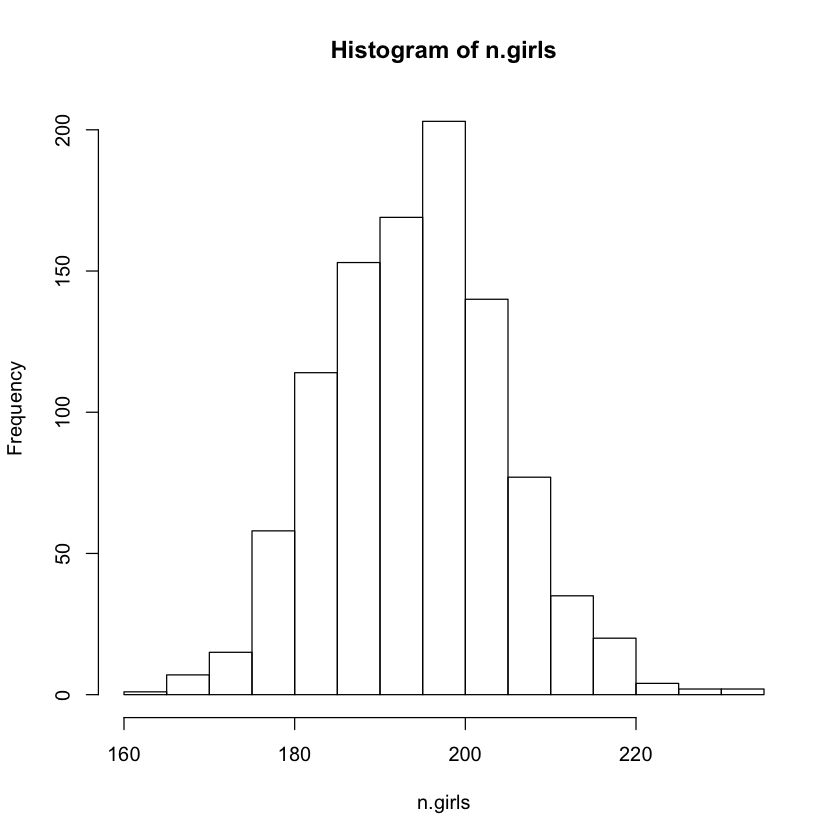

In [4]:
n.girls <- rbinom (1, 400, .488) 
n.sims <- 1000 
n.girls <- rep (NA, n.sims) 
for (s in 1:n.sims)
{ 
    n.girls[s] <- rbinom (1, 400, .488)
} 
hist (n.girls)

##### We can complicate the model in various ways. For example, there is a 1/125 chance that a birth event results in fraternal twins, of which each has an approximate 49.5% chance of being a girl, and a 1/300 chance of identical twins, which have an approximate 49.5% chance of being girls. To approximate the distribution of the number of girls in 400 births, we put the simulation in a loop and repeat it 1000 times

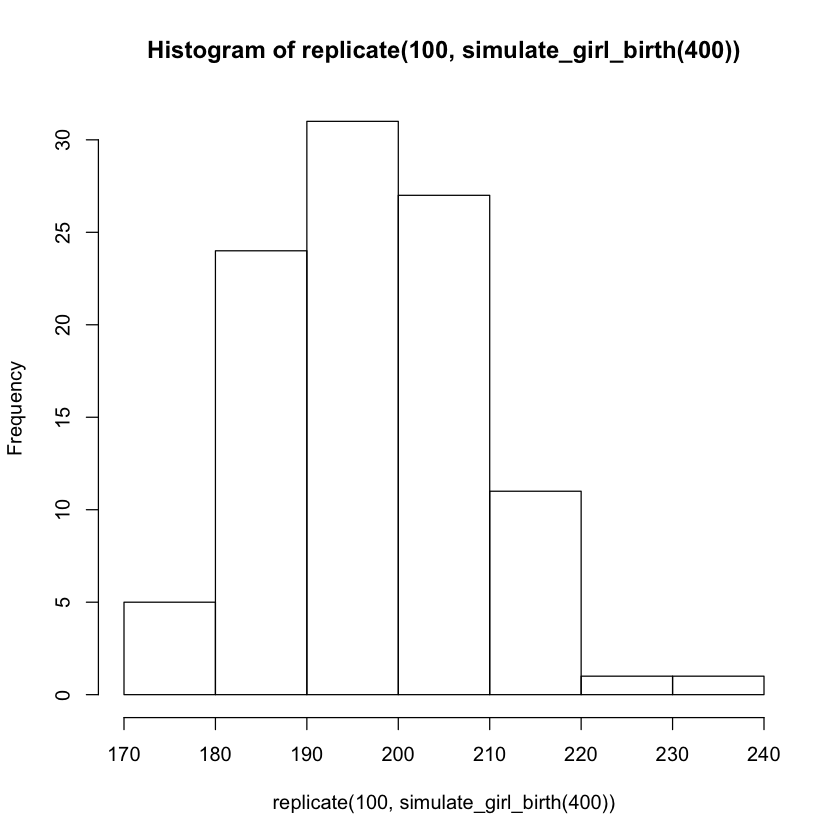

In [8]:
simulate_girl_birth <- function(n) {
    # single child, fraternal twins or identical twins
    pi <- sample(x = c(0, 1, 2), size = n, replace = TRUE, prob = c(1/125, 1/300, 1 - 1/125 - 1/300))
    
    girls <- rep(NA, n)
    # girls or boys
    for (i in 1:400) {
        if (pi[i] == 0) {
            girls[i] <- rbinom(1, 2, 0.495)
        } else if (pi[i] == 1) {
            girls[i] <- 2 * rbinom(1, 1, 0.495)
        } else {
            girls[i] <- rbinom(1, 1, 0.488)
        }
    }

    return(sum(girls))
}

hist(replicate(100, simulate_girl_birth(400)))

##### 52% of adults in the United States are women and 48% are men. The heights of the men are approximately normally distributed with mean 69.1 inches and standard deviation 2.9 inches; women with mean 63.7 and standard deviation 2.7. Suppose we select 10 adults at random. What can we say about their average height? To simulate the distribution of avg.height, we loop the simulation 1000 times

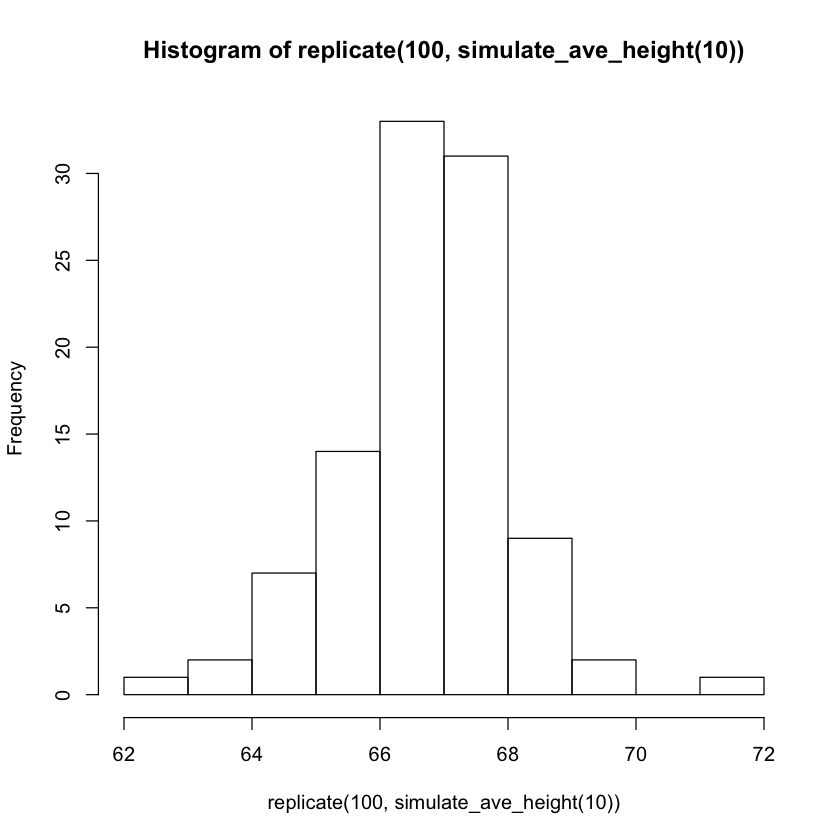

In [7]:
simulate_ave_height <- function(n) {
    # single child, fraternal twins or identical twins
    pi <- sample(x = c(0, 1), size = n, replace = TRUE, prob = c(0.52, 0.48))
    
    height = rep(NA, n)
    # girls or boys
    for (i in 1:n) {
        if (pi[i] == 0) {
            height[i] <- rnorm(1, 69.1, 2.9)
        } else if (pi[i] == 1) {
            height[i] <- rnorm(1, 63.7, 2.7)
        }
    }

    return(mean(height))
}
hist(replicate(100, simulate_ave_height(10)))

## Summarizing linear regressions using simulation

In [1]:
# Example of predicting earnings based on height, sex
library(arm)
library(foreign)
library(R2WinBUGS)
heights <- read.dta("./data/heights.dta")
attach.all(heights)

male <- 2 - sex

  # (for simplicity) remove cases with missing data
ok <- !is.na (earn+height+sex) & earn>0
heights.clean <- as.data.frame (cbind (earn, height, male)[ok,])
n <- nrow (heights.clean)
attach.all (heights.clean)
height.jitter.add <- runif (n, -.2, .2)


Warning message:
“package ‘arm’ was built under R version 3.6.1”Loading required package: MASS
Warning message:
“package ‘MASS’ was built under R version 3.6.1”Loading required package: Matrix
Loading required package: lme4
Warning message:
“package ‘lme4’ was built under R version 3.6.1”
arm (Version 1.10-1, built: 2018-4-12)

Working directory is /Users/cail/Dropbox/GitHub/lycai05.github.io/Data_science_learning_notes/Statistics/Advanced_statistical_modelling

Warning message:
“package ‘foreign’ was built under R version 3.6.1”Warning message:
“package ‘R2WinBUGS’ was built under R version 3.6.1”Loading required package: coda
Warning message:
“package ‘coda’ was built under R version 3.6.1”
Attaching package: ‘coda’

The following object is masked from ‘package:arm’:

    traceplot

Loading required package: boot
Warning message:
“package ‘boot’ was built under R version 3.6.1”
Attaching package: ‘boot’

The following object is masked from ‘package:arm’:

    logit

The following obj

In [37]:
#lm_model <- lm(formula = log.earn ~ height + male, data = heights.clean)
#display(lm_model)

In [38]:
log.earn <- log(earn)
earn.logmodel.3 <- lm(log.earn ~ height + male + height:male, data = heights.clean)
display(earn.logmodel.3)

lm(formula = log.earn ~ height + male + height:male, data = heights.clean)
            coef.est coef.se
(Intercept)  8.39     0.84  
height       0.02     0.01  
male        -0.08     1.26  
height:male  0.01     0.02  
---
n = 1192, k = 4
residual sd = 0.88, R-Squared = 0.09


The model is: log(earnings) = 8.39 + 0.02 · height − 0.08 · male + 0.01 · height · male

In [22]:
# Simulation to represent predictive uncertainty
# Obtaining the point and interval predictions automatically
x.new <- data.frame (height=68, male=1)

pred.interval <- predict (earn.logmodel.3, x.new, interval="prediction",level=.95)
print(pred.interval)
exp (pred.interval)

       fit      lwr      upr
1 9.972807 8.241334 11.70428


fit,lwr,upr
21435.57,3794.597,121088.9


In [ ]:
# The point estimate for log earnings is 
# 8.39 + 0.02 · 68 − 0.08 · 1 + 0.01 · 68 · 1 = 10.35,
# e^10.35 = 31257.0428196096
# sd = e^0.88 = 2.4
# 95% interval is [31257/2.4^2, 31257 * 2.4^2] = [5426.5625, 180040.32]

        5%        95% 
  8080.267 125481.429 


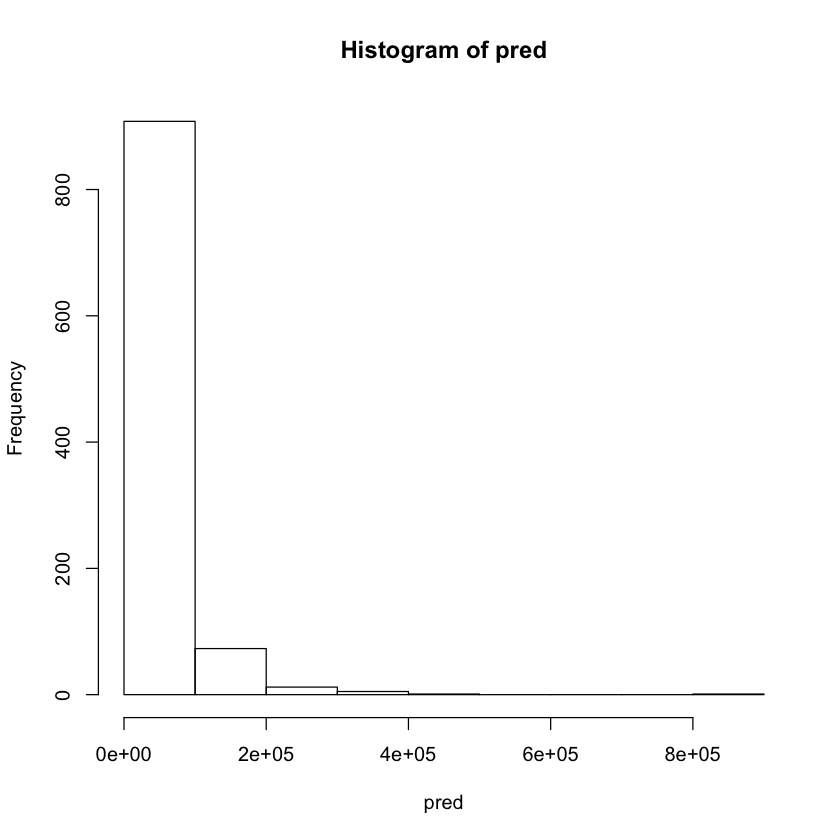

In [28]:
pred <- exp (rnorm (1000, 10.35, 0.88))
hist(pred)
print(quantile(pred,c(.05,.95)))

In [29]:
# Simulate regression coefficients
n.sims <- 1000
fit.1 <- lm (log.earn ~ height + male + height:male, data = heights.clean)
sim.1 <- sim (fit.1, n.sims)

In [35]:
head(sim.1@coef)

(Intercept),height,male,height:male
8.562777,0.014816409,-0.05162942,0.006706375
9.699617,-0.003148286,-2.23591205,0.037934661
8.168354,0.020035469,-0.63556951,0.015949798
8.308332,0.017954167,-1.08307792,0.022022767
7.562459,0.028850719,1.08545487,-0.008994421
8.949858,0.008556640,-2.86647190,0.048977779


In [36]:
height.coef <- sim.1@coef[,2]
mean(height.coef)
sd(height.coef)
quantile(height.coef, c(.25,.975))

[1] 0.01726337

[1] 0.0131943

25%      97.5% 
0.00812707 0.04277311

In [42]:
# fit a model of the probability of switching wells given the distance from the nearest safe well
wells <- read.table ("./data/wells.dat")
attach.all (wells)
fit.1 <- glm (switch ~ dist, family=binomial(link="logit"))
display (fit.1)

glm(formula = switch ~ dist, family = binomial(link = "logit"))
            coef.est coef.se
(Intercept)  0.61     0.06  
dist        -0.01     0.00  
---
  n = 3020, k = 2
  residual deviance = 4076.2, null deviance = 4118.1 (difference = 41.9)


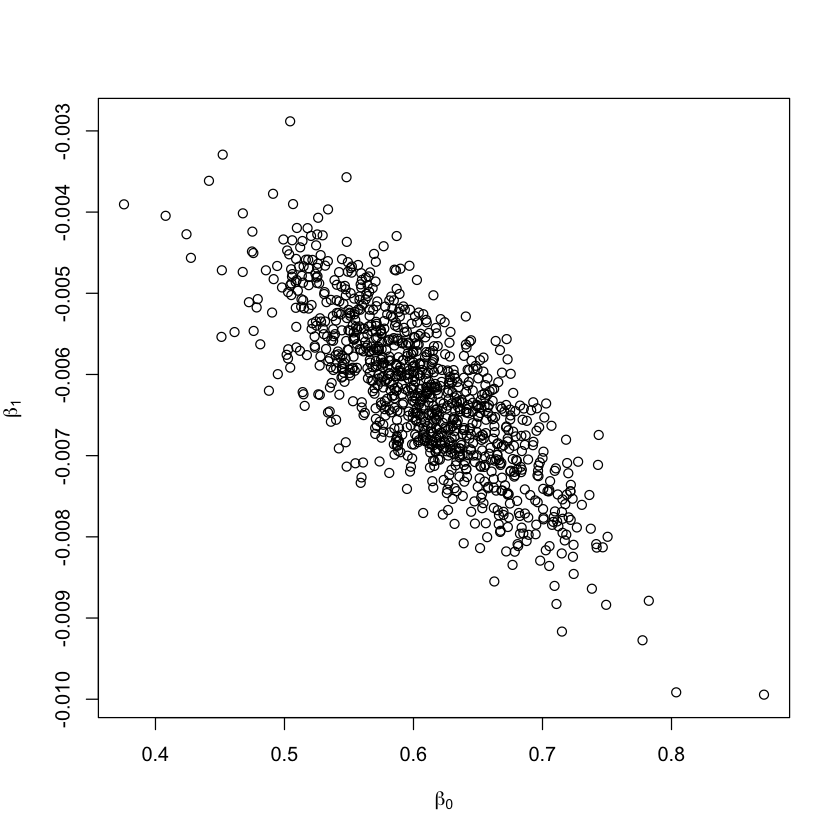

In [50]:
# simulate the uncertainty in the estimated coefficients
sim.1 <- sim(fit.1, n.sims = 1000)
plot(sim.1@coef[,1], sim.1@coef[,2], xlab = expression(beta[0]), ylab = expression(beta[1]))

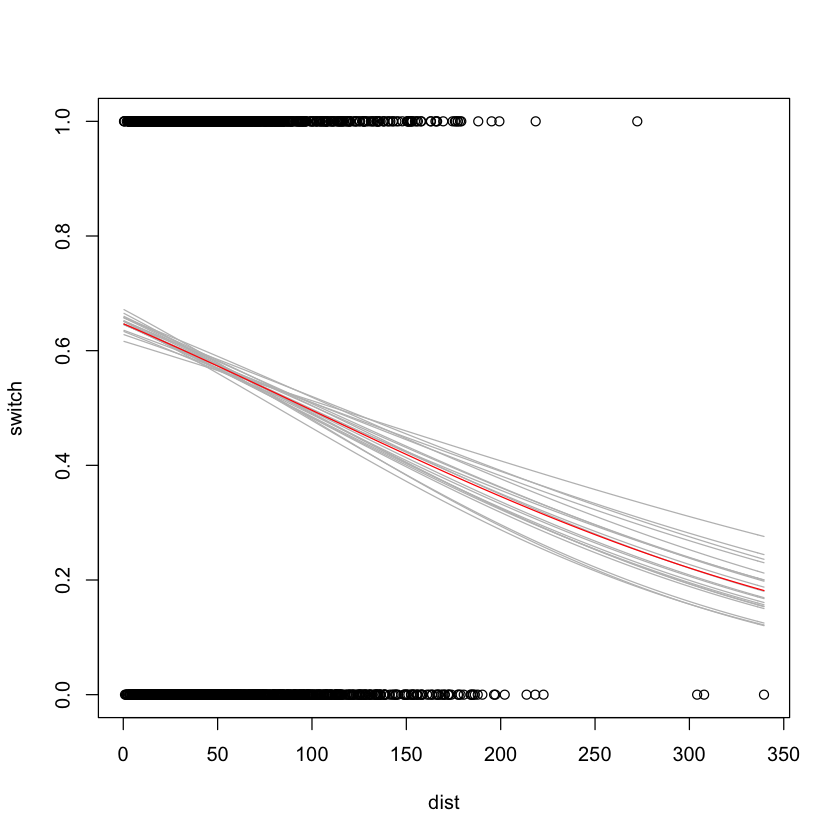

In [56]:
plot (dist, switch)
for (s in 1:20) {
    curve(invlogit(sim.1@coef[s,1] + sim.1@coef[s,2]*x), col = "grey", add = TRUE)
}
curve(invlogit(fit.1$coef[1] + fit.1$coef[2] * x), col = "red", add = TRUE)

In [60]:
# Predictive simulation using the binomial distribution
n.sims <- 1000
X.tilde <- cbind(1, dist)
n.tilde <- nrow(X.tilde)
y.tilde <- array(NA, c(n.sims, n.tilde))
for (s in n.sims) {
    p.tilde <- invlogit(X.tilde %*% sim.1@coef[s,])
    y.tilde[s,] <- rbinom(n.tilde, 1, p.tilde)
}

In [62]:
# Predictive simulation using the latent logistic distribution
y.tilde <- array (NA, c(n.sims, n.tilde)) 
for (s in 1:n.sims){ 
    epsilon.tilde <- logit (runif (n.tilde, 0, 1)) 
    z.tilde <- X.tilde %*% t(sim.1@coef) + epsilon.tilde 
    y.tilde[s,] <- ifelse (z.tilde>0, 1, 0) 
}

ERROR: Error in y.tilde[s, ] <- ifelse(z.tilde > 0, 1, 0): number of items to replace is not a multiple of replacement length


## Fake data simulation

#### Simulate linear regression model

In [66]:
# we simulate fake data from the model, y = α + βx + sigma, 
# refit the model to the simulated data, 
# and check the coverage of the 68% and 95% intervals for the coefficent β.
a <- 1.4
b <- 2.3
sigma <- 0.9
x <- 1:5
n <- length(x)

In [83]:
n.rep <- 1000
inter.68 <- rep(NA, n.rep)
inter.95 <- rep(NA, n.rep)

t.68 <- qt(0.84, n - 2)
t.95 <- qt(0.975, n - 2)

for (i in 1:n.rep) {
    y <- a + b * x + rnorm(n, 0, sigma)
    fitted <- lm(y ~ x)
    
    #a.hat <- coef(fitted)[1]
    b.hat <- coef(fitted)[2]
    b.hat.se <- se.coef(fitted)[2]
    
    inter.68[i] <- abs(b - b.hat) < t.68 * b.hat.se
    inter.95[i] <- abs(b - b.hat) < t.95 * b.hat.se
    
}

mean(inter.68)
mean(inter.95)




[1] 0.693

[1] 0.946

In [75]:
    t.68 <- qt(0.84, n - 2)
    t.95 <- qt(0.975, n - 2)
    
    y <- a + b * x + rnorm(n, 0, sigma)
    fitted <- lm(y ~ x)
    
    a.hat <- coef(fitted)[1]
    b.hat <- coef(fitted)[2]
    
    

In [76]:
b.hat.95.cov

x 
FALSE

In [80]:
display(fitted)
se.coef(fitted)

lm(formula = y ~ x)
            coef.est coef.se
(Intercept) 0.85     1.04   
x           2.52     0.31   
---
n = 5, k = 2
residual sd = 0.99, R-Squared = 0.96


(Intercept)           x 
  1.0361549   0.3124125